# practice 2. chi-square test 

이번 챕터에서는 실제 게임 회사에서 실시한 AB 테스트를 가지고 EDA 작업과 t-test, 카이 제곱 검정을 진행해보겠습니다.

데이터 셋 출처: https://www.kaggle.com/datasets/mursideyarkin/mobile-games-ab-testing-cookie-cats

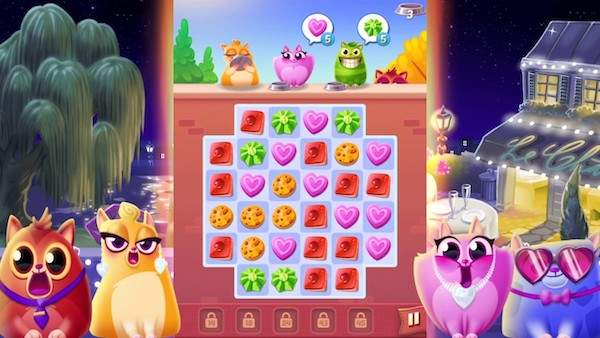

cookie cats는 모바일 퍼즐 게임입니다. 게임을 플레이하다보면 유저들은 게이트를 만납니다. 게이트를 만나면 유저는 꽤 오랜 시간을 기다리거나 결제를 해야만 합니다. 

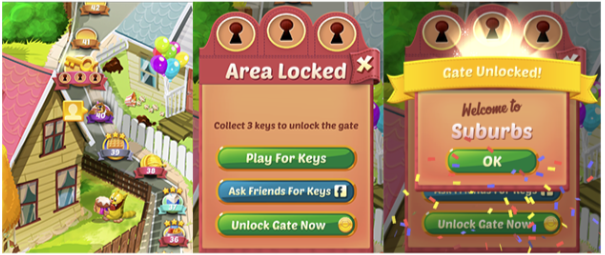

이 AB 테스트는 유저가 첫번째 게이트에 도달하는 시점을 30 라운드에서 40 라운드로 옮겼을 때, 리텐션에 어떤 변화가 있는지를 테스트 한 데이터입니다.  유저들은 무작위로 gate_30 혹은 gate_40 그룹에 할당되었습니다. 그리고 설치 후 1일 뒤에도 다시 접속했는지(retention 1), 설치 후 7일 뒤에도 다시 접속했는지 여부(retention 7)를 측정하였습니다.

### 요구사항
- 기본적인 EDA와 전처리를 진행하세요
- t-test를 이용하여 gate_30 그룹과 gate_40 그룹의 플레이 라운드 수의 평균이 같은지, 다른지 검정하세요.
- chi_squre test를 이용하여 version과 retention_1이 서로 독립인지 검정하세요.
- chi_squre test를 이용하여 version과 retention_2이 서로 독립인지 검정하세요.
- 검정 결과를 해석하고, AB 테스트의 결론을 내려보세요.

In [76]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [93]:
raw = pd.read_csv("./data/cookie_cats.csv")

#### columns
- userid: 각 플레이어를 식별하는 고유 번호
- version: 플레이어가 대조군(게이트_30 - 레벨 30의 게이트)에 속했는지, 아니면 게이트가 이동한 그룹(게이트_40 - 레벨 40의 게이트)에 속했는지 여부
- sum_gamerounds: 설치 후 첫 14일 동안 플레이어가 플레이한 게임 라운드 수
- retention_1: 플레이어가 설치 후 1일 후에 다시 돌아와서 플레이했는지 여부
- retention_7: 플레이어가 설치 후 7일 후에 다시 돌아와서 플레이했는지 여부

In [94]:
# raw

In [95]:
df = raw[:]
df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [96]:
df.shape

(90189, 5)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [98]:
df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [99]:
# df[["userid","sum_gamerounds"]].sort_values(by="sum_gamerounds", ascending=False)

<Axes: >

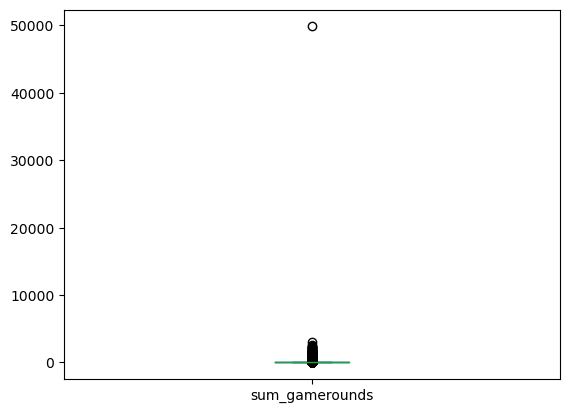

In [100]:
df["sum_gamerounds"].plot(kind="box")

# 이상치 1개 있음 => 49854 번 플레이한 사람 있음

<Axes: ylabel='Frequency'>

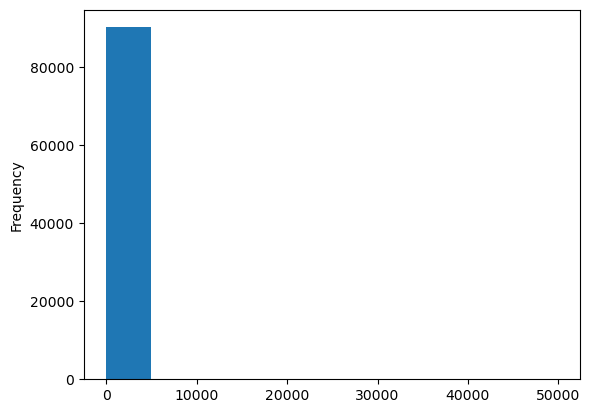

In [101]:
# 이상치 넣고 그렸을 때
df["sum_gamerounds"].plot(kind="hist")

<Axes: ylabel='Frequency'>

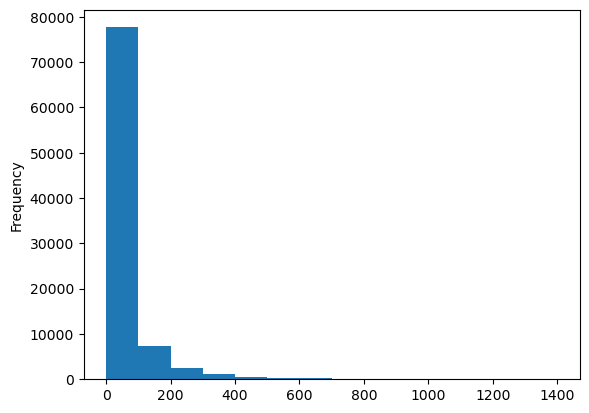

In [102]:
# 이상치 제외하고 그렸을 때
# df["sum_gamerounds"].plot(kind="hist")
df["sum_gamerounds"].plot(kind="hist", bins=np.arange(0, 1500, 100))

In [103]:
# gate_30, 40 수 확인
df["version"].value_counts()

# >> 비슷한 비율로 A집단, B 집단을 나눈 것을 확인할 수 있다.

version
gate_40    45489
gate_30    44700
Name: count, dtype: int64

In [104]:
df["retention_1"] = df["retention_1"].apply(lambda x: 1 if x else 0)
df["retention_7"] = df["retention_7"].apply(lambda x: 1 if x else 0)

In [105]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1


In [106]:
# retention_1과 retention_7이 모두 1일때 1, 아니면 0
df["retention_all"] = (df["retention_1"] & df["retention_7"]).astype(int)
# df.head()

중간 저장

In [107]:
raw2 = df[:]

In [108]:
df = raw2[:]

In [109]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7,retention_all
0,116,gate_30,3,0,0,0
1,337,gate_30,38,1,0,0
2,377,gate_40,165,1,0,0
3,483,gate_40,1,0,0,0
4,488,gate_40,179,1,1,1


<Axes: xlabel='version', ylabel='sum_gamerounds'>

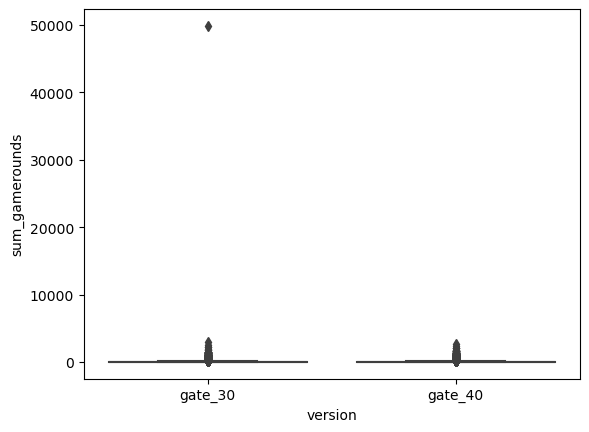

In [110]:
sns.boxplot(
    data=df,
    x="version",
    y="sum_gamerounds"
)
# gate_30에 이상치 1개 존재 >> 게임 버그 아니면 아이디 공유 아니면 매크로?.?
# >> 유의미한 값이 아니라고 판단해 해당 값 삭제

In [111]:
# 이상치 확인
df[df["sum_gamerounds"] >= 40000]

,userid,version,sum_gamerounds,retention_1,retention_7,retention_all
57702,6390605,gate_30,49854,0,1,0


In [112]:
# df.iloc[57702]

이상치 삭제

In [113]:
# df.drop(df.iloc[57702], axis=0)
df = df[df["sum_gamerounds"] < 40000]

In [114]:
df

,userid,version,sum_gamerounds,retention_1,retention_7,retention_all
0,116,gate_30,3,0,0,0
1,337,gate_30,38,1,0,0
2,377,gate_40,165,1,0,0
3,483,gate_40,1,0,0,0
4,488,gate_40,179,1,1,1
...,...,...,...,...,...,...
90184,9999441,gate_40,97,1,0,0
90185,9999479,gate_40,30,0,0,0
90186,9999710,gate_30,28,1,0,0
90187,9999768,gate_40,51,1,0,0


<Axes: xlabel='version', ylabel='sum_gamerounds'>

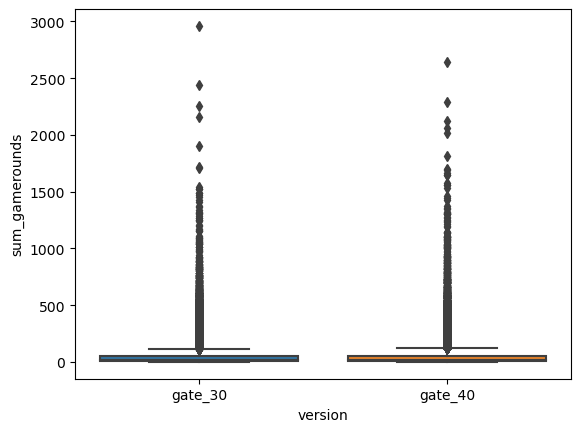

In [115]:
# 이상치 제거 후 boxplot
sns.boxplot(
    data=df,
    x="version",
    y="sum_gamerounds"
)

<Axes: xlabel='version', ylabel='sum_gamerounds'>

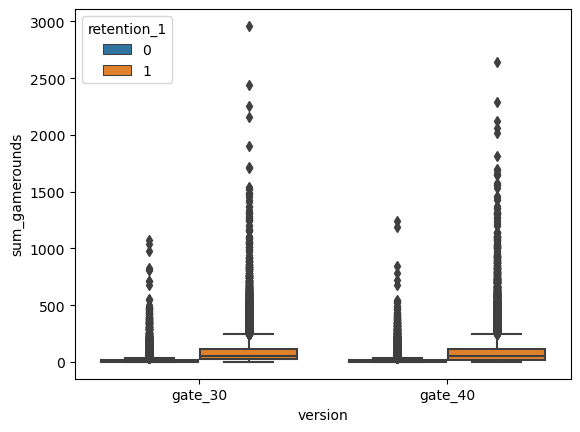

In [15]:
sns.boxplot(
    data=df,
    x="version",
    y="sum_gamerounds",
    hue="retention_1"
)

<Axes: xlabel='version', ylabel='sum_gamerounds'>

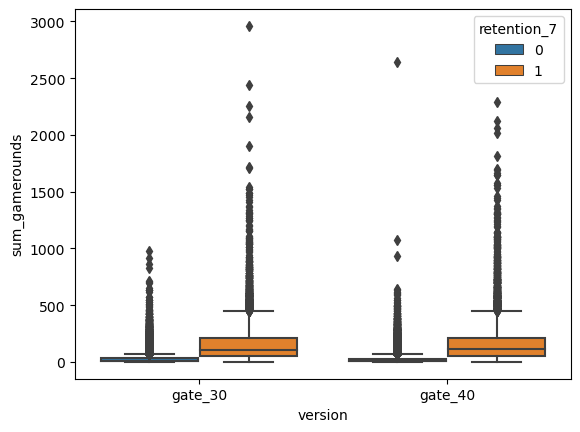

In [14]:
sns.boxplot(
    data=df,
    x="version",
    y="sum_gamerounds",
    hue="retention_7"
)

<Axes: ylabel='Frequency'>

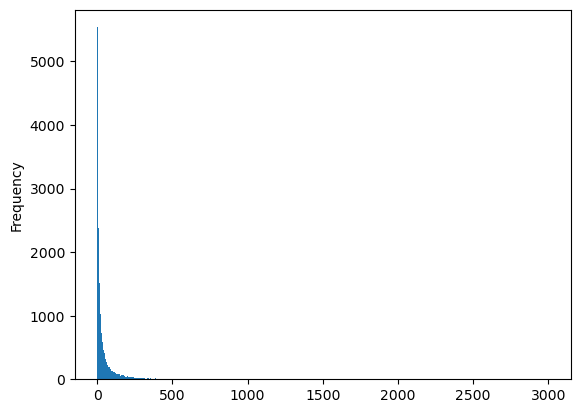

In [14]:
df["sum_gamerounds"].plot(kind="hist", bins=np.arange(0, 3000))

<Axes: xlabel='version', ylabel='sum_gamerounds'>

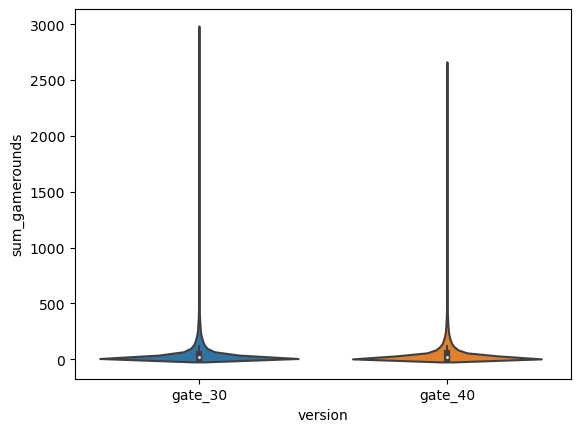

In [26]:
sns.violinplot(
    data=df,
    x="version",
    y="sum_gamerounds"
)

# >> gate_30에 속한 유저 1명이 gate_40에 속한 유저에 비해 조금 더 많이 플레이했다.

retention_all 이거 뭔가 잘못되지 않았나..?

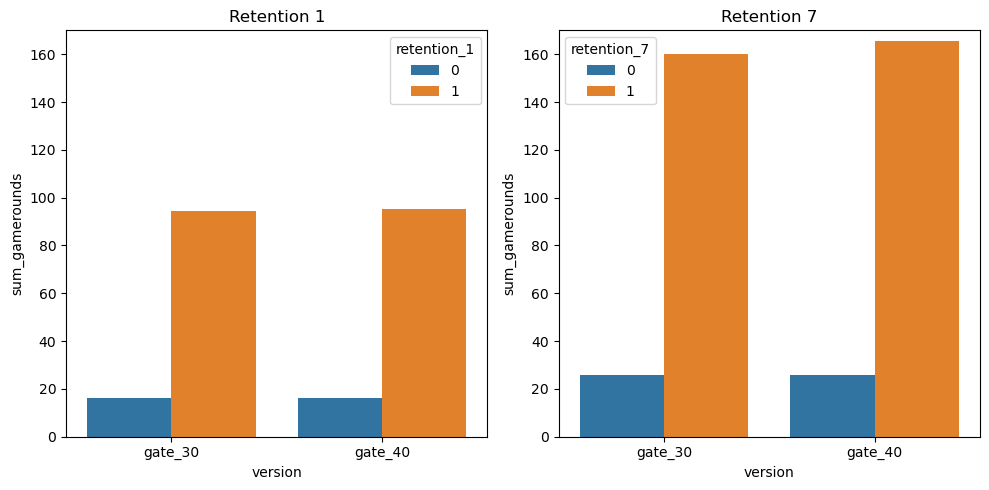

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(
    data=df,
    x="version",
    y="sum_gamerounds",
    hue="retention_1",
    errwidth=0,
    ax=axes[0]
)
axes[0].set_title("Retention 1")
axes[0].set_ylim([0, 170])

sns.barplot(
    data=df,
    x="version",
    y="sum_gamerounds",
    hue="retention_7",
    errwidth=0,
    ax=axes[1]
)
axes[1].set_title("Retention 7")
axes[1].set_ylim([0, 170])

# sns.barplot(
#     data=df,
#     x="version",
#     y="sum_gamerounds",
#     hue="retention_all",
#     errwidth=0,
#     ax=axes[2]
# )
# axes[2].set_title("Retention All")
# axes[2].set_ylim([0, 200])

plt.tight_layout()
plt.show()

In [ ]:
sns.countplot(
    x="version", 
    hue="retention_7", 
    data=df,
)

In [122]:
df

,userid,version,sum_gamerounds,retention_1,retention_7,retention_all
0,116,gate_30,3,0,0,0
1,337,gate_30,38,1,0,0
2,377,gate_40,165,1,0,0
3,483,gate_40,1,0,0,0
4,488,gate_40,179,1,1,1
...,...,...,...,...,...,...
90184,9999441,gate_40,97,1,0,0
90185,9999479,gate_40,30,0,0,0
90186,9999710,gate_30,28,1,0,0
90187,9999768,gate_40,51,1,0,0


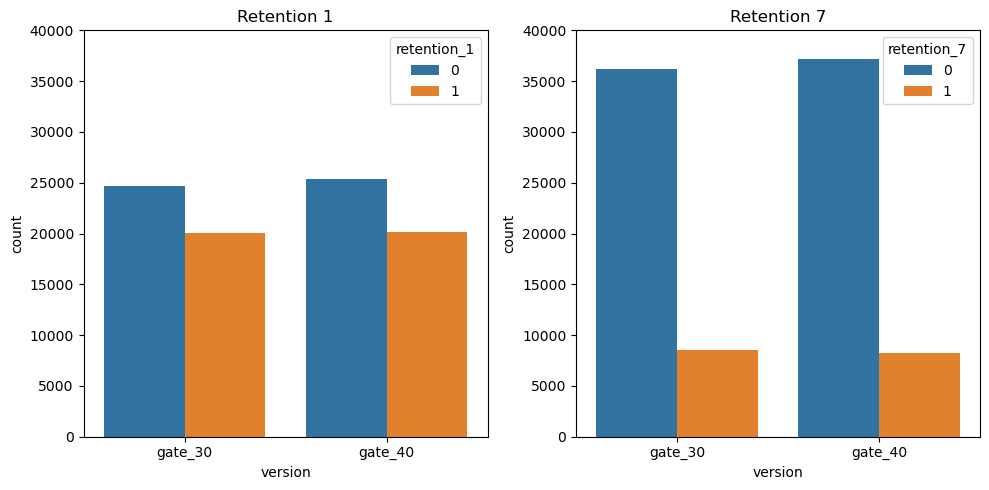

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(
    x="version", 
    hue="retention_1", 
    data=df,
    ax=axes[0]
)
axes[0].set_title("Retention 1")
axes[0].set_ylim([0, 40000])

sns.countplot(
    x="version", 
    hue="retention_7", 
    data=df,
    ax=axes[1]
)
axes[1].set_title("Retention 7")
axes[1].set_ylim([0, 40000])

plt.tight_layout()
plt.show()

In [28]:
df.groupby(["version", "retention_1"])["sum_gamerounds"].count()

version  retention_1
gate_30  0              24665
         1              20034
gate_40  0              25370
         1              20119
Name: sum_gamerounds, dtype: int64

In [32]:
df.groupby("retention_1")["sum_gamerounds"].sum()

retention_1
0     818053
1    3810418
Name: sum_gamerounds, dtype: int64

In [35]:
df[df["retention_1"]==1]["sum_gamerounds"].sum()

3810418

In [38]:
df.groupby(["version", "retention_1"])["sum_gamerounds"].count()

version  retention_1
gate_30  0              24665
         1              20034
gate_40  0              25370
         1              20119
Name: sum_gamerounds, dtype: int64

<Axes: xlabel='version', ylabel='sum_gamerounds'>

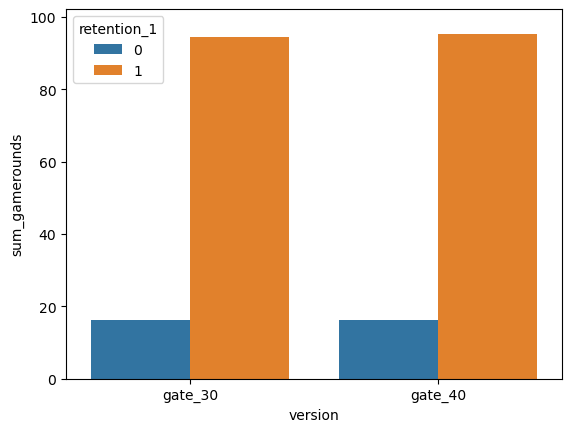

In [37]:
sns.barplot(
    data=df,
    x="version",
    y="sum_gamerounds",
    hue="retention_1",
    errwidth=0,
)

In [11]:
# # "version"별로 "retention_1"과 "retention_7"의 평균을 구함
# # grouped_data = df.groupby('version').mean()
# grouped_data = df.groupby('version')

# # 바 그래프 그리기
# fig, ax = plt.subplots()

# bar_width = 0.35
# index = range(len(grouped_data))

# bar1 = ax.bar(index, grouped_data['retention_1'], bar_width, label='Retention_1')
# bar2 = ax.bar([i + bar_width for i in index], grouped_data['retention_7'], bar_width, label='Retention_7')

# # 그래프에 레이블과 범례 추가
# ax.set_xlabel('Version')
# ax.set_ylabel('Retention Rate')
# ax.set_title('Retention Rates by Version')
# ax.set_xticks([i + bar_width / 2 for i in index])
# ax.set_xticklabels(grouped_data.index)
# ax.legend()

# # 그래프 표시
# plt.show()


In [16]:
df.sort_values(by="sum_gamerounds", ascending=False)

,userid,version,sum_gamerounds,retention_1,retention_7,retention_all
7912,871500,gate_30,2961,1,1,1
29417,3271615,gate_40,2640,1,0,0
43671,4832608,gate_30,2438,1,1,1
48188,5346171,gate_40,2294,1,1,1
46344,5133952,gate_30,2251,1,1,1
...,...,...,...,...,...,...
59687,6610805,gate_30,0,0,0,0
23707,2639282,gate_40,0,0,0,0
59670,6608718,gate_30,0,0,0,0
59645,6604544,gate_30,0,0,0,0


In [27]:
df.groupby("retention_1")["sum_gamerounds"].count()

retention_1
0    50035
1    40153
Name: sum_gamerounds, dtype: int64

In [30]:
df.groupby("retention_all")["sum_gamerounds"].count()

retention_all
0    77006
1    13182
Name: sum_gamerounds, dtype: int64

In [32]:
df.groupby("version")["retention_1"].value_counts()
# df.groupby("version")["retention_1"].count()

version  retention_1
gate_30  0              24665
         1              20034
gate_40  0              25370
         1              20119
Name: count, dtype: int64

In [32]:
df.groupby("version")["retention_7"].value_counts()

version  retention_7
gate_30  0              36198
         1               8501
gate_40  0              37210
         1               8279
Name: count, dtype: int64

In [13]:
df.groupby("version")["retention_all"].value_counts()

version  retention_all
gate_30  0                38023
         1                 6676
gate_40  0                38983
         1                 6506
Name: count, dtype: int64

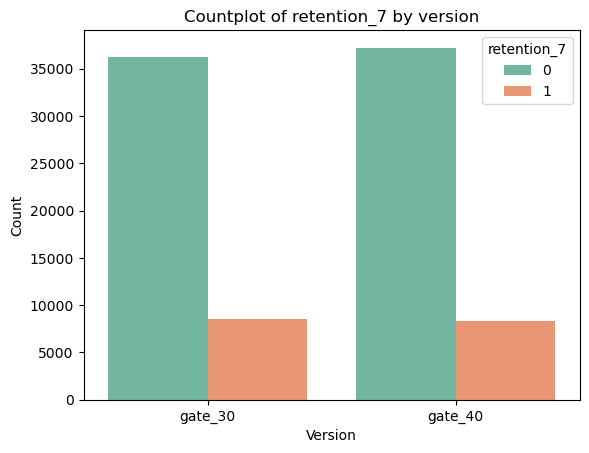

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

grouped_counts = df.groupby(["version", "retention_7"]).size().reset_index(name='count')

sns.countplot(x="version", hue="retention_7", data=df, palette="Set2")
plt.title('Countplot of retention_7 by version')
plt.xlabel('Version')
plt.ylabel('Count')
plt.show()


In [21]:
df.groupby("version")["retention_all"].value_counts()

version  retention_all
gate_30  0                38024
         1                 6676
gate_40  0                38983
         1                 6506
Name: count, dtype: int64

In [116]:
# fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# sns.boxplot(
#     data=df,
#     x="version",
#     y="sum_gamerounds",
#     hue="retention_1",
#     ax=axes[0]
# )
# axes[0].set_title("Retention 1")

# sns.boxplot(
#     data=df,
#     x="version",
#     y="sum_gamerounds",
#     hue="retention_7",
#     ax=axes[1]
# )
# axes[1].set_title("Retention 7")

# # sns.boxplot(
# #     data=df,
# #     x="version",
# #     y="sum_gamerounds",
# #     hue="retention_all",
# #     ax=axes[2]
# # )
# # axes[2].set_title("Retention All")

# plt.tight_layout()
# plt.show()


In [126]:
df.groupby(["version","retention_1"])[["userid"]].count()

userid
version retention_1        
gate_30 0             24665
        1             20034
gate_40 0             25370
        1             20119

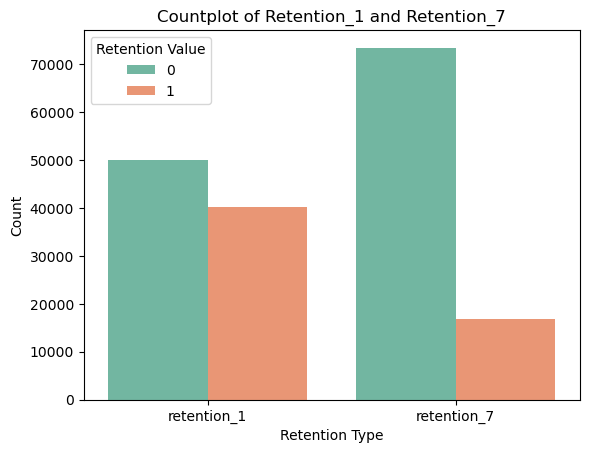

In [127]:
# plt.figure(figsize=(8, 6))
sns.countplot(
    x="variable", 
    hue="value", 
    data=pd.melt(df[['retention_1', 'retention_7']]), 
    palette="Set2"
)
plt.title('Countplot of Retention_1 and Retention_7')
plt.xlabel('Retention Type')
plt.ylabel('Count')
plt.legend(title='Retention Value')
plt.show()

In [159]:
ret1_grouped = df.groupby('retention_1')['userid'].nunique().reset_index()
ret1_grouped

,retention_1,userid
0,0,50035
1,1,40153


In [168]:
ver30_ret1 = df[(df["version"]=="gate_30") & (df["retention_1"]==1)]["userid"].count()
ver30_ret1

20034

In [169]:
ver30_ret7 = df[(df["version"]=="gate_30") & (df["retention_7"]==1)]["userid"].count()
ver30_ret7

8501

In [23]:
df.groupby('version')['retention_1'].mean()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

In [136]:
df.groupby('version')['retention_7'].sum()/df.groupby('version')['retention_7'].count()

version
gate_30    0.190183
gate_40    0.182000
Name: retention_7, dtype: float64

In [138]:
df.groupby('version')['retention_7'].sum()

version
gate_30    8501
gate_40    8279
Name: retention_7, dtype: int64

In [177]:
df_retention_ab = df.groupby("version").agg({"userid":"count", "retention_1":"mean","retention_7":"mean", "sum_gamerounds":"sum"})
df_retention_ab

,userid,retention_1,retention_7,sum_gamerounds
version,,,,
gate_30,44699,0.448198,0.190183,2294941
gate_40,45489,0.442283,0.182000,2333530


In [184]:
df = df[df["sum_gamerounds"] < 3000].reset_index()

In [24]:
df.groupby("sum_gamerounds")["userid"].count()[:100].sort_values(ascending=False)

# 1회 플레이한 유저 = 5538명
# 2회 플레이한 유저 = 4606명
# 0회 플레이한 유저 = 3994명

sum_gamerounds
1     5538
2     4606
0     3994
3     3958
4     3629
      ... 
96     135
92     134
99     133
93     130
94     126
Name: userid, Length: 100, dtype: int64

Text(0, 0.5, 'number of players(100)')

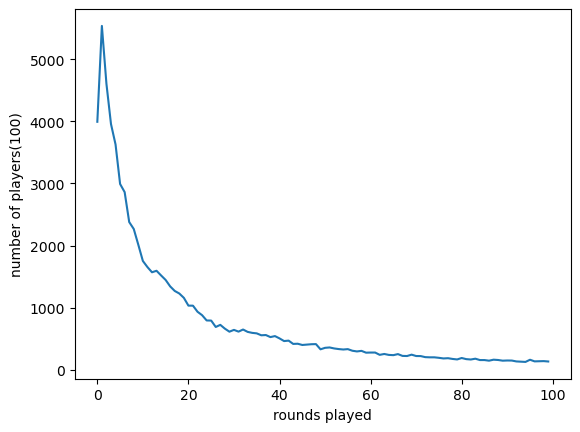

In [20]:
plot_df = df.groupby("sum_gamerounds")["userid"].count()
ax = plot_df.head(100).plot()
ax.set_xlabel("rounds played")
ax.set_ylabel("number of players(100)")

# >> 플레이 횟수가 많아질수록 플레이한 유저 수 또한 줄어든다.

In [11]:
df_corr = df[["sum_gamerounds", "retention_1", "retention_7", "retention_all"]].corr()
df_corr

,sum_gamerounds,retention_1,retention_7,retention_all
sum_gamerounds,1.000000,0.380178,0.519288,0.546873
retention_1,0.380178,1.000000,0.327431,0.461856
retention_7,0.519288,0.327431,1.000000,0.865374
retention_all,0.546873,0.461856,0.865374,1.000000


<Axes: >

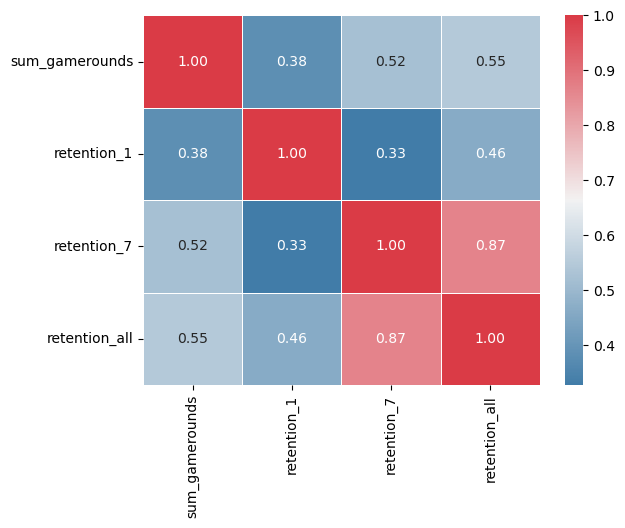

In [12]:
cmap=sns.diverging_palette(240,10,n=9, as_cmap=True)
sns.heatmap(
    data=df_corr,
    annot=True,
    fmt=".2f",
    linewidth=0.5,
    cmap=cmap
)

# 재접속 유무와 게임 플레이 횟수 사이에는 강한 상관관계가 있다고 할 수 있다.
# >> 플레이 횟수가 많아지면 retention_1, retention_7, retention_all 의 값도 커진다
# >> 1일 후 재접속하는 사람일수록 게임 플레이 횟수가 많고, 7일 후에 재접속하는 사람일 수록 플레이 횟수가 1 재접속 유저보다 많을 것이다.
# >> 또한 1일, 7일 후에도 재접속하는 사람일수록 게임 플레이 횟수가 다른 사람들에 비해 더 많을 것이다.

<BarContainer object of 90188 artists>

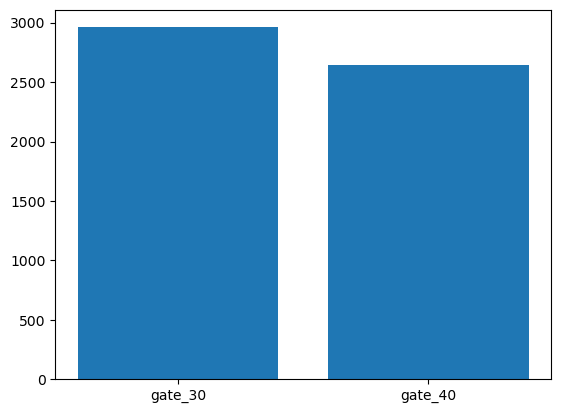

In [36]:
plt.bar(x=df["version"], height=df["sum_gamerounds"])

### t-test

- t-test를 이용하여 gate_30 그룹과 gate_40 그룹의 플레이 라운드 수의 평균이 같은지, 다른지 검정하세요.

- 귀무가설: gate_30 평균 플레이 라운드 수와 gate_40의 평균 플레이 라운드 수의 차는 0이다.
- 대립가설: gate_30 평균 플레이 라운드 수와 gate_40의 평균 플레이 라운드 수의 차는 0이 아니다.

In [117]:
df.groupby(["version"])[["sum_gamerounds"]].mean()

,sum_gamerounds
version,
gate_30,51.342111
gate_40,51.298776


결정론적인 관점에서보면 단순히 gate_30에 속한 유저의 평균 플레이 횟수와 gate_40에 속한 유저의 평균 플레이 횟수가 같다고 결론지을 수도 있다.

-> 우연히 같다고 나온 것은 아닐까?

#### 등분산 검정

In [135]:
from scipy import stats

scores_30 = df[df['version'] == 'gate_30']["sum_gamerounds"]
scores_40 = df[df['version'] == 'gate_40']["sum_gamerounds"]


_, p_value_levene = stats.levene(scores_30, scores_40)
if p_value_levene > 0.05:
    print(f"p-value: {p_value_levene}, 등분산 가정 만족")
else:
    print(f"p-value: {p_value_levene}, 이분산 가정 만족")

p-value: 0.7840494387892463, 등분산 가정 만족


등분산 가정을 만족하므로, 등분산 two sample t-test를 수행

#### t-test

In [138]:
t_statistic, p_value = stats.ttest_ind(
    a=scores_30,
    b=scores_40,
    # 양측
    alternative="two-sided",
    equal_var=True
)

print(f"t통계량: {t_statistic}, p-value: {p_value}")
print(f"귀무 가설 기각: {p_value < 0.05}")

t통계량: 0.0633675766982082, p-value: 0.9494739458256001
귀무 가설 기각: False


In [139]:
t_statistic, p_value = stats.ttest_ind(
    a=scores_30,
    b=scores_40,
    # 양측
    alternative="greater",
    equal_var=True
)

print(f"t통계량: {t_statistic}, p-value: {p_value}")
print(f"귀무 가설 기각: {p_value < 0.05}")

t통계량: 0.0633675766982082, p-value: 0.47473697291280004
귀무 가설 기각: False


⭐️p-value가 유의수준보다 크기때문에 귀무가설을 기각할 수 없다. 즉, gate_30의 평균 플레이 횟수는 gate_40의 평균 플레이 횟수와 차이가 없다고 결론 내릴 수 있다.

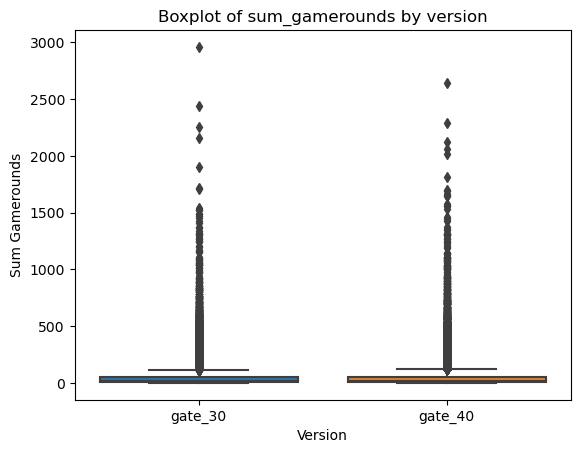

In [76]:
# 두 그룹 간 평균 차이가 크게 없음
import seaborn as sns
import matplotlib.pyplot as plt

# "gate_30"과 "gate_40"의 데이터 선택
gate_30_data = df[df['version'] == 'gate_30']['sum_gamerounds']
gate_40_data = df[df['version'] == 'gate_40']['sum_gamerounds']

# boxplot 또는 violinplot 그리기
# plt.figure(figsize=(10, 6))
sns.boxplot(x='version', y='sum_gamerounds', data=df)
plt.title('Boxplot of sum_gamerounds by version')
plt.xlabel('Version')
plt.ylabel('Sum Gamerounds')
plt.show()


In [89]:
df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [131]:
from scipy import stats

scores_30 = df[df['retention_7'] == 0]["sum_gamerounds"]
scores_40 = df[df['retention_7'] == 1]["sum_gamerounds"]

_, p_value_levene = stats.levene(scores_30, scores_40)
if p_value_levene > 0.05:
    print(f"p-value: {p_value_levene}, 등분산 가정 만족")
else:
    print(f"p-value: {p_value_levene}, 이분산 가정 만족")

p-value: 0.0, 이분산 가정 만족


In [132]:
t_statistic, p_value = stats.ttest_ind(
    a=scores_30,
    b=scores_40,
    # 양측
    alternative="two-sided",
    equal_var=False
)

print(f"t통계량: {t_statistic}, p-value: {p_value}")
print(f"귀무 가설 기각: {p_value < 0.05}")

t통계량: -97.10579268070096, p-value: 0.0
귀무 가설 기각: True


In [133]:
t_statistic, p_value = stats.ttest_ind(
    a=scores_30,
    b=scores_40,
    # 단측
    alternative="greater",
    equal_var=False
)

print(f"t통계량: {t_statistic}, p-value: {p_value}")
print(f"귀무 가설 기각: {p_value < 0.05}")

t통계량: -97.10579268070096, p-value: 1.0
귀무 가설 기각: False


### chi-square test

##### chi_squre test를 이용하여 version과 retention_1이 서로 독립인지 검정하세요.
- 귀무가설: 두 변수 version과 retention_1은 독립이다. 즉, 기대 빈도와 관측 빈도는 동일하다.
- 대립가설: 두 변수 version과 retention_1은 독립이 아니다. 즉, 기대 빈도와 관측 빈도는 다르다.

In [120]:
from scipy.stats import chi2_contingency

In [121]:
# 상대 도수 분할표
table_1 = pd.crosstab(
    df["version"], 
    df["retention_1"],
    # margin, normalize 하면 결과 이상하게 나옴
)
table_1

retention_1,0,1
version,,
gate_30,24665,20034
gate_40,25370,20119


In [122]:
# 카이 제곱 검정
chi2_statistics, pvalue, _, _ = chi2_contingency(table_1)

print(f"카이 제곱 통계량: {chi2_statistics}")
print(f"p-value: {pvalue}")

카이 제곱 통계량: 3.169835543170799
p-value: 0.07500999897705693


⭐️귀무가설 기각 불가 => version과 retention_1은 독립이다.

In [123]:
# gate_30 - retention_1 = 0 기대빈도
result = (0.554786 * 0.50438) * 90188
result

25236.67335818384

In [124]:
# 분할표
table_1 = pd.crosstab(
    df["version"], 
    df["retention_1"], 
    margins=True
)
table_1

# >> 기대빈도 24798.366과 관측빈도 24665와 비슷하기 때문에 두 변수는 독립이라고 할 수 있다.

retention_1,0,1,All
version,,,
gate_30,24665,20034,44699
gate_40,25370,20119,45489
All,50035,40153,90188


##### chi_squre test를 이용하여 version과 retention_7이 서로 독립인지 검정하세요.
- 귀무가설: 두 변수 version과 retention_7은 독립이다. 즉, 기대 빈도와 관측 빈도는 동일하다.
- 대립가설: 두 변수 version과 retention_7은 독립이 아니다. 즉, 기대 빈도와 관측 빈도는 다르다.

In [125]:
table_7 = pd.crosstab(
    df["version"], 
    df["retention_7"],
)
table_7

retention_7,0,1
version,,
gate_30,36198,8501
gate_40,37210,8279


In [126]:
# 카이 제곱 검정
chi2_statistics, pvalue, _, _ = chi2_contingency(table_7)

print(f"카이 제곱 통계량: {chi2_statistics}")
print(f"p-value: {pvalue}")

카이 제곱 통계량: 9.91527552890567
p-value: 0.0016391259678654425


⭐️귀무가설 기각 => version과 retention_7은 독립이 아니다. 즉, 두 변수 사이에 모종의 상관관계가 존재한다.

In [127]:
# gate_30 - 0 기대빈도
result = (0.49562 * 0.813944) * 90188
result

36382.46377715264

In [83]:
df2 = df[:]

In [84]:
# df2

In [85]:
df2["version"] = df2["version"].apply(lambda x: 1 if x=="gate_40" else 0)

In [86]:
df2

,userid,version,sum_gamerounds,retention_1,retention_7,retention_all
0,116,0,3,0,0,0
1,337,0,38,1,0,0
2,377,1,165,1,0,0
3,483,1,1,0,0,0
4,488,1,179,1,1,1
...,...,...,...,...,...,...
90184,9999441,1,97,1,0,0
90185,9999479,1,30,0,0,0
90186,9999710,0,28,1,0,0
90187,9999768,1,51,1,0,0


In [87]:
df2_corr = df2[["version", "sum_gamerounds", "retention_1", "retention_7", "retention_all"]].corr()
df2_corr

,version,sum_gamerounds,retention_1,retention_7,retention_all
version,1.000000,-0.000211,-0.005951,-0.010514,-0.008960
sum_gamerounds,-0.000211,1.000000,0.380178,0.519288,0.546873
retention_1,-0.005951,0.380178,1.000000,0.327431,0.461856
retention_7,-0.010514,0.519288,0.327431,1.000000,0.865374
retention_all,-0.008960,0.546873,0.461856,0.865374,1.000000


<Axes: >

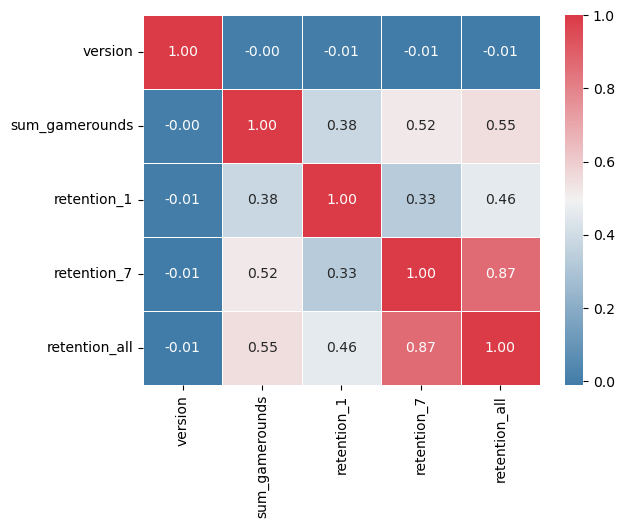

In [88]:
cmap=sns.diverging_palette(240,10,n=9, as_cmap=True)
sns.heatmap(
    data=df2_corr,
    annot=True,
    fmt=".2f",
    linewidth=0.5,
    cmap=cmap
)

<Axes: xlabel='version', ylabel='count'>

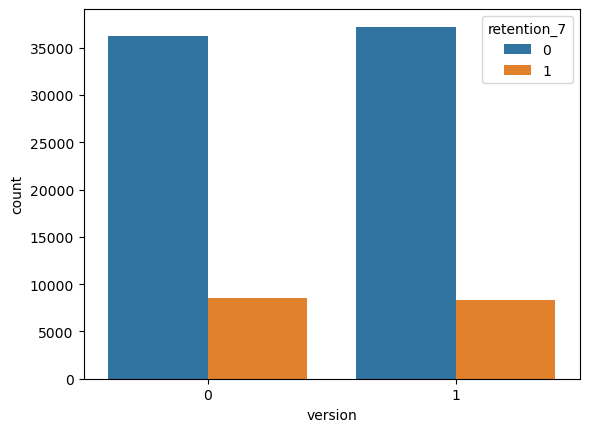

In [89]:
sns.countplot(
    x="version", 
    hue="retention_7", 
    data=df2,
)

<Axes: xlabel='version', ylabel='count'>

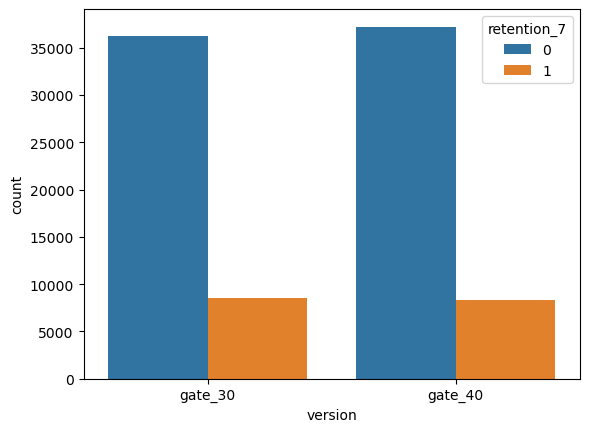

In [117]:
sns.countplot(
    x="version", 
    hue="retention_7", 
    data=df,
)

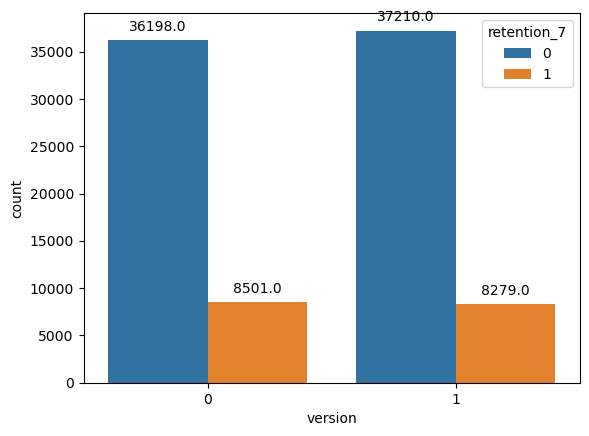

In [90]:
ax = sns.countplot(x="version", hue="retention_7", data=df2)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

<Axes: xlabel='version', ylabel='sum_gamerounds'>

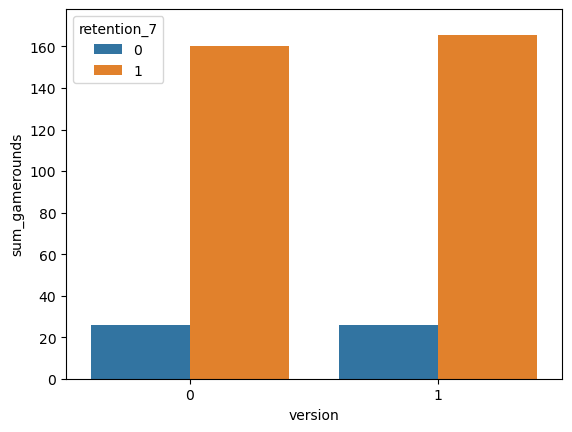

In [91]:
sns.barplot(
    data=df2,
    x="version",
    y="sum_gamerounds",
    hue="retention_7",
    errwidth=0
)

In [92]:
result = df2.groupby(['version', 'retention_1','retention_7'])['userid'].nunique()
result

version  retention_1  retention_7
0        0            0              22840
                      1               1825
         1            0              13358
                      1               6676
1        0            0              23597
                      1               1773
         1            0              13613
                      1               6506
Name: userid, dtype: int64

In [94]:
result = df.groupby(['version', 'retention_1','retention_7'])['userid'].nunique()

# 결과를 DataFrame으로 변환
result_df = result.reset_index()
result_df

,version,retention_1,retention_7,userid
0,gate_30,0,0,22840
1,gate_30,0,1,1825
2,gate_30,1,0,13358
3,gate_30,1,1,6676
4,gate_40,0,0,23597
5,gate_40,0,1,1773
6,gate_40,1,0,13613
7,gate_40,1,1,6506


In [150]:
df[(df["version"]=="gate_40") & (df["retention_1"]==1) & (df["retention_7"]==1)]["userid"].count()

6506

In [157]:
df[(df["version"]=="gate_40") & (df["retention_1"]==1) & (df["retention_7"]==0)]["userid"].count()

13613

In [158]:
df[(df["version"]=="gate_40") & (df["retention_1"]==0) & (df["retention_7"]==1)]["userid"].count()

1773

In [159]:
df[(df["version"]=="gate_40") & (df["retention_1"]==0) & (df["retention_7"]==0)]["userid"].count()

23597

#### count_df 데이터프레임 생성

In [21]:
import pandas as pd
### 데이터 
count_df = pd.DataFrame()
count_df['version'] = ['gate_30','gate_40']
count_df['(ret_1=T, ret_7=T)'] = [6676, 6506]
count_df['(ret_1=T, ret_7=F)'] = [13358, 13613]
count_df['(ret_1=F, ret_7=T)'] = [1825, 1773]
count_df['(ret_1=F, ret_7=F)'] = [22840, 23597]


In [26]:
count_df

,version,"(ret_1=T, ret_7=T)","(ret_1=T, ret_7=F)","(ret_1=F, ret_7=T)","(ret_1=F, ret_7=F)"
0,gate_30,6676,13358,1825,22840
1,gate_40,6506,13613,1773,23597


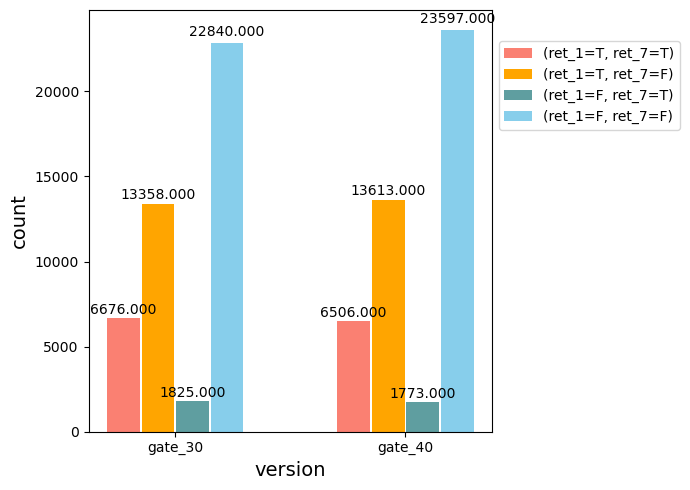

In [27]:
def main():
    #### 1. bar plot으로 나타낼 데이터 입력
    models = ['(ret_1=T, ret_7=T)', '(ret_1=T, ret_7=F)', '(ret_1=F, ret_7=T)', '(ret_1=F, ret_7=F)']
    xticks = ['gate_30', 'gate_40']
    data = count_df

    #### 2. matplotlib의 figure 및 axis 설정
    fig, ax = plt.subplots(1,1,figsize=(7,5)) # 1x1 figure matrix 생성, 가로(7인치)x세로(5인치) 크기지정
    colors = ['salmon', 'orange', 'cadetblue', 'skyblue']
    width = 0.15

    #### 3. bar 그리기
    for i, model in enumerate(models):
        pos = compute_pos(xticks, width, i, models)
        bar = ax.bar(pos, data[model], width=width*0.95, label=model, color=colors[i])
        present_height(ax, bar) # bar높이 출력
    
    #### 4. x축 세부설정
    ax.set_xticks(range(len(xticks)))
    ax.set_xticklabels(xticks, fontsize=10)	
    ax.set_xlabel('version', fontsize=14)

    #### 5. y축 세부설정
    # ax.set_ylim([0.5,0.76])
    # ax.set_yticks([0.5, 0.55, 0.6, 0.65, 0.7, 0.75])
    # ax.yaxis.set_tick_params(labelsize=10)
    ax.set_ylabel('count', fontsize=14)
    
    #### 6. 범례 나타내기
    # ax.legend(loc='upper right', shadow=True, ncol=1)
    plt.legend(loc='lower left', bbox_to_anchor=(1, 0.7))

    plt.tight_layout()
    plt.show()

def compute_pos(xticks, width, i, models):
    index = np.arange(len(xticks))
    n = len(models)
    correction = i-0.5*(n-1)
    return index + width*correction

def present_height(ax, bar):
    for rect in bar:
        height = rect.get_height()
        posx = rect.get_x()+rect.get_width()*0.5
        posy = height*1.01
        ax.text(posx, posy, '%.3f' % height, ha='center', va='bottom')
        
if __name__=='__main__':
    main()

게이트 버전과 retention은 크게 차이가 있는 것 같진 않다.

In [197]:
df[(df["version"]=="gate_40") & (df["retention_1"]==1) & (df["retention_7"]==1)]["sum_gamerounds"].sum()

1237977

In [199]:
df[(df["version"]=="gate_40") & (df["retention_1"]==1) & (df["retention_7"]==0)]["sum_gamerounds"].sum()

680997

In [201]:
df[(df["version"]=="gate_40") & (df["retention_1"]==0) & (df["retention_7"]==1)]["sum_gamerounds"].sum()

133438

In [204]:
df[(df["version"]=="gate_40") & (df["retention_1"]==0) & (df["retention_7"]==0)]["sum_gamerounds"].sum()

281118

In [215]:
df[df["version"]=="gate_40"]["sum_gamerounds"].sum()

2333530

#### gamerounds_df 데이터프레임 생성

In [20]:
import pandas as pd
### 데이터 
gamerounds_df = pd.DataFrame()
gamerounds_df['version'] = ['gate_30','gate_40']
gamerounds_df['(ret_1=T, ret_7=T)'] = [1227625, 1237977]
gamerounds_df['(ret_1=T, ret_7=F)'] = [663819, 680997]
gamerounds_df['(ret_1=F, ret_7=T)'] = [133534, 133438]
gamerounds_df['(ret_1=F, ret_7=F)'] = [269963, 281118]
# gamerounds_df['(ret_1=T, ret_7=T)'] = [1227625/2294941, 1237977/2333530]
# gamerounds_df['(ret_1=T, ret_7=F)'] = [663819/2294941, 680997/2333530]
# gamerounds_df['(ret_1=F, ret_7=T)'] = [133534/2294941, 133438/2333530]
# gamerounds_df['(ret_1=F, ret_7=F)'] = [269963/2294941, 281118/2333530]


In [29]:
gamerounds_df

,version,"(ret_1=T, ret_7=T)","(ret_1=T, ret_7=F)","(ret_1=F, ret_7=T)","(ret_1=F, ret_7=F)"
0,gate_30,1227625,663819,133534,269963
1,gate_40,1237977,680997,133438,281118


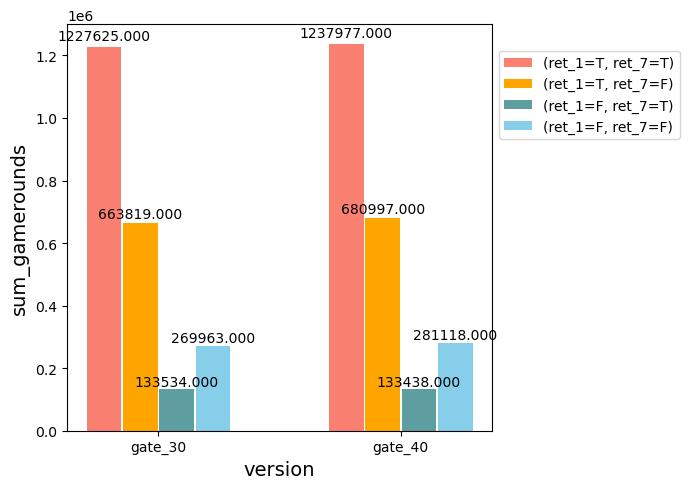

In [31]:
def main():
    #### 1. bar plot으로 나타낼 데이터 입력
    models = ['(ret_1=T, ret_7=T)', '(ret_1=T, ret_7=F)', '(ret_1=F, ret_7=T)', '(ret_1=F, ret_7=F)']
    xticks = ['gate_30', 'gate_40']
    data = gamerounds_df

    #### 2. matplotlib의 figure 및 axis 설정
    fig, ax = plt.subplots(1,1,figsize=(7,5)) # 1x1 figure matrix 생성, 가로(7인치)x세로(5인치) 크기지정
    colors = ['salmon', 'orange', 'cadetblue', 'skyblue']
    width = 0.15

    #### 3. bar 그리기
    for i, model in enumerate(models):
        pos = compute_pos(xticks, width, i, models)
        bar = ax.bar(pos, data[model], width=width*0.95, label=model, color=colors[i])
        present_height(ax, bar) # bar높이 출력
    
    #### 4. x축 세부설정
    # ax.set_xlim([0, 1300000])
    ax.set_xticks(range(len(xticks)))
    ax.set_xticklabels(xticks, fontsize=10)
    ax.set_xlabel('version', fontsize=14)

    #### 5. y축 세부설정
    # ax.set_ylim([0, 1300000, 200000])
    # ax.set_ylim(ymin=0, ymax=1300000)
    # plt.ylim([0, 1200000])
    # plt.yticks(range(0, 1200001, 200000))
    # ax.set_yticks([0.5, 0.55, 0.6, 0.65, 0.7, 0.75])
    # ax.yaxis.set_tick_params(labelsize=10)
    ax.set_ylabel('sum_gamerounds', fontsize=14)

    #### 6. 범례 나타내기
    # ax.legend(loc='upper right', shadow=True, ncol=1)
    plt.legend(loc='lower left', bbox_to_anchor=(1, 0.7))

    plt.tight_layout()
    plt.show()

def compute_pos(xticks, width, i, models):
    index = np.arange(len(xticks))
    n = len(models)
    correction = i-0.5*(n-1)
    return index + width*correction

def present_height(ax, bar):
    for rect in bar:
        height = rect.get_height()
        posx = rect.get_x()+rect.get_width()*0.5
        posy = height*1.01
        ax.text(posx, posy, '%.3f' % height, ha='center', va='bottom')
        
if __name__=='__main__':
    main()

3) 게임에 더 많은  시간을 투자한 유저들은 일주일 동안의 유지율이 더 높을 것이다.

-> 게임 플레이 횟수에 대한 유저 수 비율

In [23]:
gamerounds_df

,version,"(ret_1=T, ret_7=T)","(ret_1=T, ret_7=F)","(ret_1=F, ret_7=T)","(ret_1=F, ret_7=F)"
0,gate_30,1227625,663819,133534,269963
1,gate_40,1237977,680997,133438,281118


In [22]:
count_df

,version,"(ret_1=T, ret_7=T)","(ret_1=T, ret_7=F)","(ret_1=F, ret_7=T)","(ret_1=F, ret_7=F)"
0,gate_30,6676,13358,1825,22840
1,gate_40,6506,13613,1773,23597


In [34]:
import pandas as pd
### 데이터 
ratio_df = pd.DataFrame()
ratio_df['version'] = ['gate_30','gate_40']
ratio_df['(ret_1=T, ret_7=T)'] = [6676 / 1227625 * 100, 6506 / 1237977 * 100]
ratio_df['(ret_1=T, ret_7=F)'] = [13358 / 663819 * 100, 13613 / 680997 * 100]
ratio_df['(ret_1=F, ret_7=T)'] = [1825 / 133534 * 100, 1773 / 133438 * 100]
ratio_df['(ret_1=F, ret_7=F)'] = [22840 / 269963 * 100, 23597 / 281118 * 100]

In [35]:
ratio_df

,version,"(ret_1=T, ret_7=T)","(ret_1=T, ret_7=F)","(ret_1=F, ret_7=T)","(ret_1=F, ret_7=F)"
0,gate_30,0.543814,2.012296,1.366693,8.460419
1,gate_40,0.525535,1.998981,1.328707,8.393984


/var/folders/bc/bsqk8v9x20jgf1jsh_fbh7z40000gn/T/ipykernel_17948/1967502995.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks, fontsize=10)


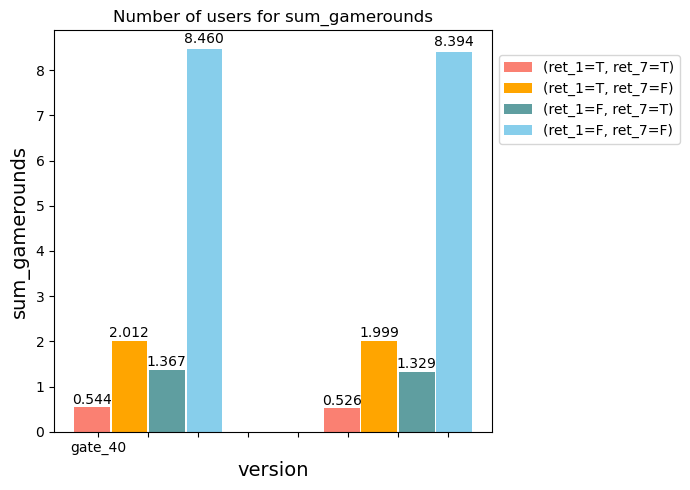

In [36]:
def main():
    #### 1. bar plot으로 나타낼 데이터 입력
    models = ['(ret_1=T, ret_7=T)', '(ret_1=T, ret_7=F)', '(ret_1=F, ret_7=T)', '(ret_1=F, ret_7=F)']
    xticks = ['gate_30', 'gate_40']
    data = ratio_df

    #### 2. matplotlib의 figure 및 axis 설정
    fig, ax = plt.subplots(1,1,figsize=(7,5)) # 1x1 figure matrix 생성, 가로(7인치)x세로(5인치) 크기지정
    colors = ['salmon', 'orange', 'cadetblue', 'skyblue']
    width = 0.15

    #### 3. bar 그리기
    for i, model in enumerate(models):
        pos = compute_pos(xticks, width, i, models)
        bar = ax.bar(pos, data[model], width=width*0.95, label=model, color=colors[i])
        present_height(ax, bar) # bar높이 출력
    
    #### 4. x축 세부설정
    # # ax.set_xlim([0, 1300000])
    # ax.set_xticks(range(len(xticks)))
    ax.set_xticklabels(xticks, fontsize=10)
    ax.set_xlabel('version', fontsize=14)

    #### 5. y축 세부설정
    # ax.set_ylim([0, 1300000, 200000])
    # ax.set_ylim(ymin=0, ymax=1300000)
    # plt.ylim([0, 1200000])
    # plt.yticks(range(0, 1200001, 200000))
    # ax.set_yticks([0.5, 0.55, 0.6, 0.65, 0.7, 0.75])
    # ax.yaxis.set_tick_params(labelsize=10)
    ax.set_ylabel('sum_gamerounds', fontsize=14)

    #### 6. 범례 나타내기
    # ax.legend(loc='upper right', shadow=True, ncol=1)
    plt.legend(loc='lower left', bbox_to_anchor=(1, 0.7))

    plt.title("Number of users for sum_gamerounds")
    plt.tight_layout()
    plt.show()

def compute_pos(xticks, width, i, models):
    index = np.arange(len(xticks))
    n = len(models)
    correction = i-0.5*(n-1)
    return index + width*correction

def present_height(ax, bar):
    for rect in bar:
        height = rect.get_height()
        posx = rect.get_x()+rect.get_width()*0.5
        posy = height*1.01
        ax.text(posx, posy, '%.3f' % height, ha='center', va='bottom')
        
if __name__=='__main__':
    main()

게임에 더 많은 시간을 투자한 유저들은 일주일 동안의 유지율이 더 높을 것이다.

-> 유저 수를 게임 플레이 횟수로 나눠줌

In [ ]:
df[df["version"]=="gate_30"]

<Axes: ylabel='count'>

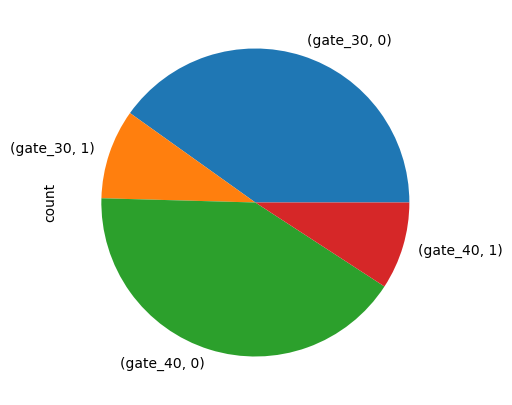

In [116]:
df.groupby('version')['retention_7'].value_counts().plot(kind="pie", figsize = (5,5))

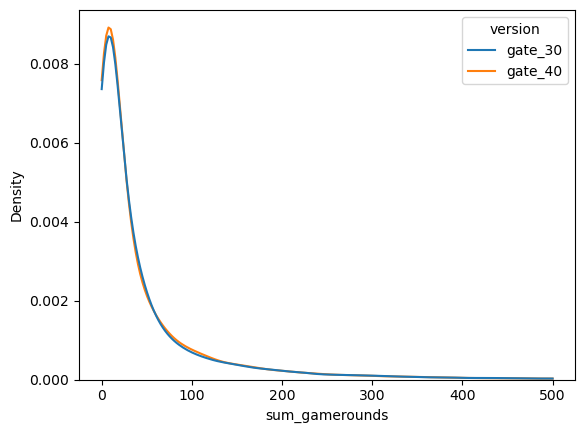

In [21]:
# plt.figure(figsize=(12,8))
sns.kdeplot(x = 'sum_gamerounds' , data = df , hue = 'version', clip=(0, 500))
plt.show()

- 검정 결과를 해석하고, AB 테스트의 결론을 내려보세요.